# Optimization and plots 

### 2D contour plots

Source: https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html


Sometimes it is useful to display three-dimensional data in two dimensions using contours or color-coded regions. There are three Matplotlib functions that can be helpful for this task: plt.contour for contour plots, plt.contourf for filled contour plots, and plt.imshow for showing images. This section looks at several examples of using these. 

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

**Example**
a contour plot using a function $z = f(x, y)$

A contour plot can be created with the plt.contour function. It takes three arguments: a grid of x values, a grid of y values, and a grid of z values. The x and y values represent positions on the plot, and the z values will be represented by the contour levels. Perhaps the most straightforward way to prepare such data is to use the np.meshgrid function, which builds two-dimensional grids from one-dimensional arrays:

In [107]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)
    
x = np.linspace(0, 5, 100)
y = np.linspace(0, 5, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

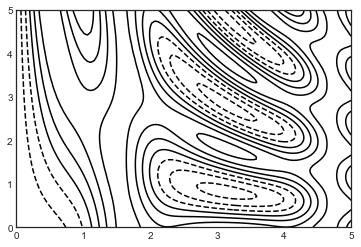

In [108]:
#Black and white contour map
plt.contour(X, Y, Z, colors='black');

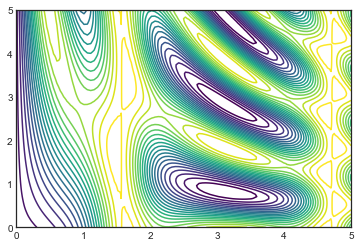

In [109]:
#Adding a color map and specifying how many lines to draw
plt.contour(X, Y, Z,20, cmap='viridis');


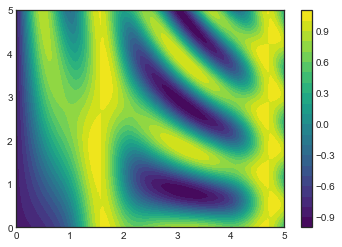

In [110]:
#Filled contour plot and bar
plt.contourf(X, Y, Z, 20, cmap='viridis')
plt.colorbar();

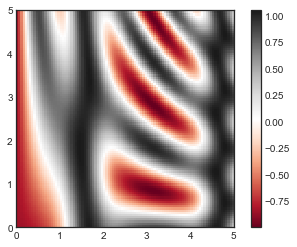

In [111]:
#Show plot as continuous function, 
#use the plt.imshow() function, which interprets a two-dimensional grid of data as an image.
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy')
plt.colorbar()
plt.axis(aspect='image');

### Combining contour, contourf and image to put a background and a foreground plot 

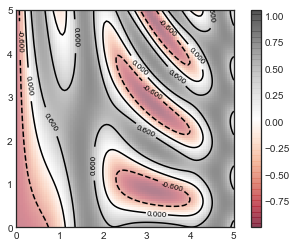

In [112]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();

## Plotting in 3D
Source: https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

Requires the import of 3 dimensional plotting toolkit which comes with matplotlib. Once this submodule is imported, a three-dimensional axes can be created by passing the keyword projection='3d' to any of the normal axes creation routines.

When viewing figures interactively rather than statically in the notebook; recall that to use interactive figures, you can use %matplotlib notebook rather than %matplotlib inline when running this code.

In [115]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

### Plot a trigonometric spiral, along with some points drawn randomly near the line

<IPython.core.display.Javascript object>


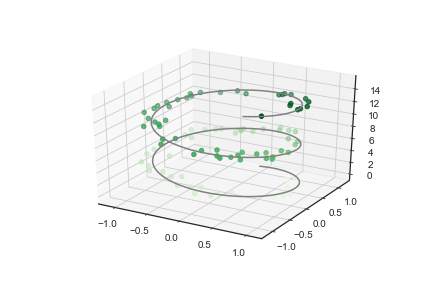

In [116]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

### 3D contour plots 
ax.contour3D requires all the input data to be in the form of two-dimensional regular grids, with the Z data evaluated at each point. Here we'll show a three-dimensional contour diagram of a three-dimensional sinusoidal function:

In [117]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

<IPython.core.display.Javascript object>


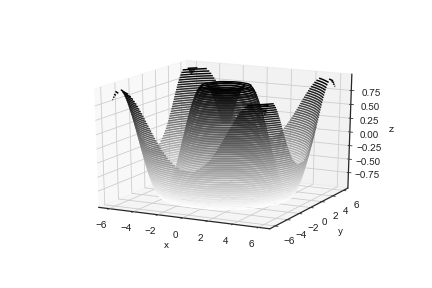

In [118]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

### 3D wireframe 

<IPython.core.display.Javascript object>


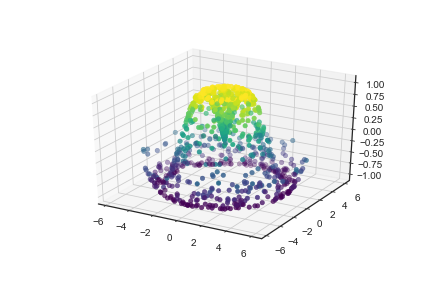

In [126]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');

### Surfaceplot
A surface plot is like a wireframe plot, but each face of the wireframe is a filled polygon. Adding a colormap to the filled polygons can aid perception of the topology of the surface being visualized:

<IPython.core.display.Javascript object>


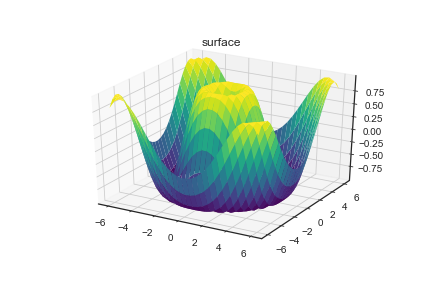

In [130]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

### Surgace triangulation 
For some applications, the evenly sampled grids required by the above routines is overly restrictive and inconvenient. In these situations, the triangulation-based plots can be very useful. What if rather than an even draw from a Cartesian or a polar grid, we instead have a set of random draws?

In [123]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)


<IPython.core.display.Javascript object>


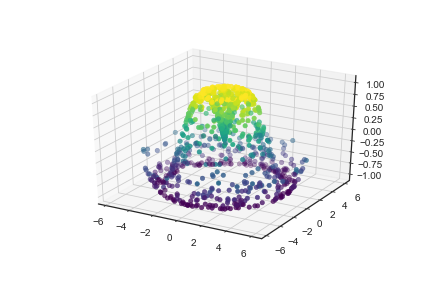

In [133]:
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);

The function that will help us in this case is ax.plot_trisurf, which creates a surface by first finding a set of triangles formed between adjacent points (remember that x, y, and z here are one-dimensional arrays):

<IPython.core.display.Javascript object>


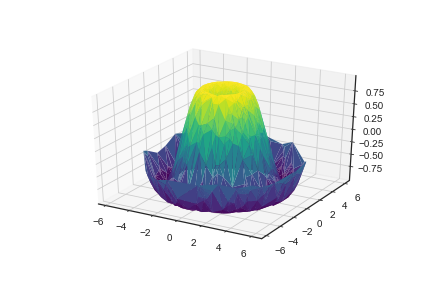

In [134]:
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,
                cmap='viridis', edgecolor='none');